# Task A

a)The objective of the data collection process is Human Activity Recognition (HAR) which aims to identify the actions carried out by a person given a set of observations of him/herself and the surrounding environment. Recognition can be accomplished by exploiting the information retrieved from various sources such as environmental or body-worn sensors.

b)The human activity types does this dataset have are standing, sitting, laying down, walking, walking downstairs and upstairs.A group of 30 volunteers
with ages ranging from 19 to 48 years were selected for this task

c)A total of 561 features were extracted to describe each activity window. The dataset has been also randomly partitioned into
two independent sets, where 70% of the data were selected for training and the remaining 30% for testing.

d)The machine learning model used in this paper for activity recognition is Support Vector Machine and They are trained as SVM hyperparameters are selected through a 10-fold Cross Validation procedure and Gaussian kernels.The maximum accuracy achieved is 96% for the test data composed of 2947 patterns.

# Task B

In this project we will run different models and then we will compare which one is best model for human activity recognition. So, to start with that we will load the files of train and test

In [1]:
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from sklearn import metrics
from sklearn.cross_validation import cross_val_score



Xtrain =  np.loadtxt("X_train.txt")
ytrain = np.loadtxt("y_train.txt")
Xtest =  np.loadtxt("X_test.txt")
ytest = np.loadtxt("y_test.txt")



C:\Users\Sukhvinder\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Sukhvinder\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Our First Model is the KNN model for this we will take values from 1 to 50. For choosing the best K we will use the 10-fold cross-validation.
After that we will Choose the best value of K based on model F1-score.

In [2]:
knnvalues = list(range(1, 51))
param_grid = dict(n_neighbors=knnvalues)
knn_model = KNeighborsClassifier(n_neighbors=knnvalues)
grid1 = GridSearchCV(knn_model, param_grid, cv=10, scoring='f1_weighted',n_jobs=-1)
grid2 = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy',n_jobs=-1)
grid1.fit(Xtrain, ytrain) 
grid2.fit(Xtrain, ytrain)

print("F1 Scores :",grid1.grid_scores_)
print("Accuracy Scores:",grid2.grid_scores_)

F1 Scores : [mean: 0.89097, std: 0.03219, params: {'n_neighbors': 1}, mean: 0.87922, std: 0.03078, params: {'n_neighbors': 2}, mean: 0.90216, std: 0.03367, params: {'n_neighbors': 3}, mean: 0.90084, std: 0.02920, params: {'n_neighbors': 4}, mean: 0.90620, std: 0.03373, params: {'n_neighbors': 5}, mean: 0.90520, std: 0.03064, params: {'n_neighbors': 6}, mean: 0.90640, std: 0.03432, params: {'n_neighbors': 7}, mean: 0.90884, std: 0.03326, params: {'n_neighbors': 8}, mean: 0.90515, std: 0.03432, params: {'n_neighbors': 9}, mean: 0.90932, std: 0.03330, params: {'n_neighbors': 10}, mean: 0.90699, std: 0.03415, params: {'n_neighbors': 11}, mean: 0.90789, std: 0.03373, params: {'n_neighbors': 12}, mean: 0.90592, std: 0.03526, params: {'n_neighbors': 13}, mean: 0.90821, std: 0.03353, params: {'n_neighbors': 14}, mean: 0.90730, std: 0.03355, params: {'n_neighbors': 15}, mean: 0.90571, std: 0.03527, params: {'n_neighbors': 16}, mean: 0.90597, std: 0.03372, params: {'n_neighbors': 17}, mean: 0.90

Now after getting the f1 scores we have to choose the best value of K on model F1-score.For that we will take the mean score of the grid and after that we will plot the graph

In [3]:
Meanscore = [result.mean_validation_score for result in grid1.grid_scores_]
print("Mean Score of the F1-Score:",Meanscore)


Mean Score of the F1-Score: [0.8909746388323774, 0.8792213371224419, 0.9021558954312175, 0.9008394418778818, 0.9061995831896125, 0.9051956863751959, 0.9063992628560865, 0.9088422837157544, 0.9051502298357804, 0.909316280204744, 0.9069869525234425, 0.9078860906190369, 0.905920027880161, 0.908205627037723, 0.9072962680908698, 0.9057141619895316, 0.9059696229675531, 0.9062184505604068, 0.9062951742264447, 0.9075215542089543, 0.9058311041920581, 0.9044195939167018, 0.904942635091798, 0.9039492096243847, 0.9042975462857602, 0.9037009463865175, 0.9036862810952656, 0.9024835027037087, 0.901082676787693, 0.9018051533201611, 0.9022492186157282, 0.9023445804724717, 0.902262602495391, 0.9019492643060046, 0.9015074267911745, 0.9008124657125026, 0.9011813392521694, 0.9013222311112953, 0.9016918436406254, 0.9014250941844199, 0.8994657361881038, 0.9012546195847972, 0.8998125063500676, 0.899909941824877, 0.9001167287218704, 0.9001995245622839, 0.8982311470513425, 0.898962035355253, 0.8980098778710666,

Plotting a graph for cross validation with respect to K

0.909316280204744
Value of K based On F1 score is  {'n_neighbors': 10}
The confusion mat:
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]
KNN Testing Accuracy is: 0.9066847641669494
KNN F1 score is: 0.9059781880301676


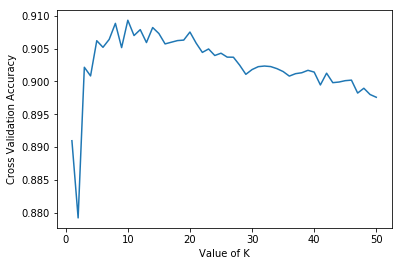

In [5]:
plt.plot(knnvalues, Meanscore)
plt.xlabel('Value of K')
plt.ylabel('Cross Validation Accuracy')

print(grid1.best_score_) #f1 score
print("Value of K based On F1 score is  {}".format(grid1.best_params_))
#best params based on k
knnmodel = KNeighborsClassifier(n_neighbors = 10)#best k value

knnmodel.fit(Xtrain, ytrain)
knnpredict = knnmodel.predict(Xtest)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest,knnpredict)

print("The confusion mat:")

print(confusion_matrix)

knn_accuracy = metrics.accuracy_score(ytest,knnpredict)
print("KNN Testing Accuracy is: {}".format(knn_accuracy))

knn_accuracy_metrics = metrics.f1_score(ytest,knnpredict,average='weighted')
print("KNN F1 score is: {}".format(knn_accuracy_metrics))


Confusion matrix, multi-class averaged F1-score and accuracy

In [6]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(ytest,knnpredict)

print("Confusion matrix:\n",ConfusionMatrix)

knn_accuracy = metrics.accuracy_score(ytest,knnpredict)
print("KNN Testing Accuracy is: {}".format(knn_accuracy))

knn_accuracy_metrics = metrics.f1_score(ytest,knnpredict,average='weighted')
print("KNN F1 score is: {}".format(knn_accuracy_metrics))


Confusion matrix:
 [[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]
KNN Testing Accuracy is: 0.9066847641669494
KNN F1 score is: 0.9059781880301676


# Task C

In this task the values for alpha values and l1 was given. We use the elastic net when we have to perform regularized linear and logistic regression using both L1 and L2 together.
The SGDClassifier is used in this for the classification model and we have used the cross validation =10.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

alpha=[1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2]
l1 = [0,0.15,0.5,0.7,1]
                                                                                                                            
paramgrid1 = dict(alpha=alpha,l1_ratio=l1)
enet=SGDClassifier(loss='log',penalty='elasticnet')
grid3 = GridSearchCV(enet,paramgrid1, n_jobs=-1,cv=10,scoring='f1_weighted')

grid3.fit(Xtrain, ytrain)
print("The F1 Scores are :",grid3.grid_scores_)

print(grid3.best_score_)

print("Best value of alpha and l1_ratio based on F1 score is {}".format(grid3.best_params_))

MeanSquare2 = [result.mean_validation_score for result in grid2.grid_scores_]
print(MeanSquare2)

C:\Users\Sukhvinder\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


The F1 Scores are : [mean: 0.91450, std: 0.07176, params: {'alpha': 0.0001, 'l1_ratio': 0}, mean: 0.91950, std: 0.06311, params: {'alpha': 0.0001, 'l1_ratio': 0.15}, mean: 0.93043, std: 0.05718, params: {'alpha': 0.0001, 'l1_ratio': 0.5}, mean: 0.92246, std: 0.04613, params: {'alpha': 0.0001, 'l1_ratio': 0.7}, mean: 0.92903, std: 0.05008, params: {'alpha': 0.0001, 'l1_ratio': 1}, mean: 0.91632, std: 0.07084, params: {'alpha': 0.0003, 'l1_ratio': 0}, mean: 0.92885, std: 0.04614, params: {'alpha': 0.0003, 'l1_ratio': 0.15}, mean: 0.93514, std: 0.05114, params: {'alpha': 0.0003, 'l1_ratio': 0.5}, mean: 0.93113, std: 0.05103, params: {'alpha': 0.0003, 'l1_ratio': 0.7}, mean: 0.92257, std: 0.05394, params: {'alpha': 0.0003, 'l1_ratio': 1}, mean: 0.92237, std: 0.04569, params: {'alpha': 0.001, 'l1_ratio': 0}, mean: 0.93380, std: 0.05705, params: {'alpha': 0.001, 'l1_ratio': 0.15}, mean: 0.93404, std: 0.05037, params: {'alpha': 0.001, 'l1_ratio': 0.5}, mean: 0.93065, std: 0.05767, params: {'a

Graph for surface plot of F1-Score with respect to alpha and l1 ratio

[[0.   0.15 0.5  0.7  1.  ]
 [0.   0.15 0.5  0.7  1.  ]
 [0.   0.15 0.5  0.7  1.  ]
 [0.   0.15 0.5  0.7  1.  ]
 [0.   0.15 0.5  0.7  1.  ]
 [0.   0.15 0.5  0.7  1.  ]]
[[0.0001 0.0001 0.0001 0.0001 0.0001]
 [0.0003 0.0003 0.0003 0.0003 0.0003]
 [0.001  0.001  0.001  0.001  0.001 ]
 [0.003  0.003  0.003  0.003  0.003 ]
 [0.01   0.01   0.01   0.01   0.01  ]
 [0.03   0.03   0.03   0.03   0.03  ]]
[[0.89213819 0.8804407  0.90356366 0.90152339 0.90737214]
 [0.90601197 0.90764418 0.90968444 0.90642002 0.91022851]
 [0.90818825 0.90873232 0.90710011 0.90914037 0.90846028]
 [0.90669206 0.90723613 0.90737214 0.90750816 0.9085963 ]
 [0.90710011 0.90560392 0.906284   0.90519587 0.90573993]
 [0.90505985 0.90519587 0.90383569 0.90261153 0.9031556 ]]


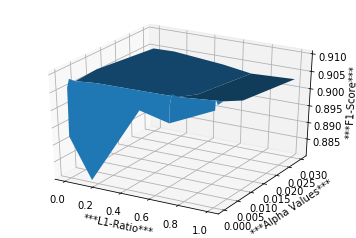

In [8]:
loop =0
e= alpha 
f= l1 
mean= np.zeros([6,5])
for i in range(0,6):
    for j in range(0,5):
        mean[i,j]=MeanSquare2[loop]
        loop=loop+1

X,Y  = np.meshgrid(f, e)
C = mean
print(X)
print(Y)
print(mean)
fig = plt.figure()
ax = fig.gca(projection='3d')
surfacegraph = ax.plot_surface(X, Y, C, rstride=3, cstride=3, antialiased=True)
ax.set_xlabel('***L1-Ratio***')
ax.set_ylabel('***Alpha Values***')
ax.set_zlabel('***F1-Score***')
plt.show()

After seeing the graph we will use the best alpha value and the l1_ratio value so that we can predict the confusion matrix,accuracy and accuracy metrics.

In [9]:
enet_model=SGDClassifier(penalty='elasticnet',alpha=0.001,l1_ratio=0.7)
enet_model.fit(Xtrain, ytrain)
enet_predict = enet_model.predict(Xtest)

C:\Users\Sukhvinder\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Confusion Matrix

In [10]:
ConfusionMatrix1 = confusion_matrix(ytest,enet_predict)
print("     CONFUSION MATRIX\n",ConfusionMatrix1)

     CONFUSION MATRIX
 [[491   2   3   0   0   0]
 [ 17 430  21   1   2   0]
 [  3  12 401   0   4   0]
 [  0   3   3 409  76   0]
 [  2   0   0  15 515   0]
 [  0   0   0   0   0 537]]


Accuracy Metrics

In [11]:
enet_accuracymetrics = metrics.f1_score(ytest,enet_predict,average='weighted')
print("Elastic Net F1 score is: {}".format(enet_accuracymetrics))

Elastic Net F1 score is: 0.9440127463775343


Accuracy

In [12]:
enet_accuracy = metrics.accuracy_score(ytest,enet_predict)
print("Elastic Net Testing Accuracy is: {}".format(enet_accuracy))

Elastic Net Testing Accuracy is: 0.9443501866304717


# Task D

In this we have given the values for gamma and cost parameter for given. So we have to find best values for best gamma and C and after that we have to plot the graph after that we have to find the confusion matrix, accuracy and metrics averaged.

In [13]:
gamma=[1e-3, 1e-4]
C=[1,10,100,1000]

paramgrid3 = dict(gamma=gamma, C=C)
print("values:",paramgrid3)

values: {'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}


In [14]:
SVM=SVC()
grid4 = GridSearchCV(SVM,paramgrid3, n_jobs=-1,cv=10,scoring='f1_weighted')

grid4.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=0)

In [15]:
# Grid Search Function
GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=0)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=0)

F1 score for support vector machine model

In [16]:
print("F1 Scores for SVM:\n",grid4.grid_scores_)

grid_MSE = [result.mean_validation_score for result in grid4.grid_scores_]
print("Score:\n",grid_MSE)



F1 Scores for SVM:
 [mean: 0.90623, std: 0.04264, params: {'C': 1, 'gamma': 0.001}, mean: 0.79000, std: 0.04077, params: {'C': 1, 'gamma': 0.0001}, mean: 0.94230, std: 0.04226, params: {'C': 10, 'gamma': 0.001}, mean: 0.90649, std: 0.04295, params: {'C': 10, 'gamma': 0.0001}, mean: 0.95006, std: 0.04236, params: {'C': 100, 'gamma': 0.001}, mean: 0.94158, std: 0.04443, params: {'C': 100, 'gamma': 0.0001}, mean: 0.95165, std: 0.04209, params: {'C': 1000, 'gamma': 0.001}, mean: 0.94720, std: 0.04572, params: {'C': 1000, 'gamma': 0.0001}]
Score:
 [0.90622808605955, 0.7900034414841904, 0.9422994292996064, 0.9064889993999662, 0.9500604188562756, 0.9415806790564664, 0.9516493213913358, 0.9471973908306649]


For finding the Best Score

In [17]:
print("Best Score is:\n",grid4.best_score_)

Best Score is:
 0.9516493213913358


In [18]:
print(grid3.best_estimator_)

SGDClassifier(alpha=0.0003, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.5, learning_rate='optimal',
       loss='log', max_iter=None, n_iter=None, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       tol=None, verbose=0, warm_start=False)


Plotting the surface graph for C,gamma 

[[0.001  0.0001]
 [0.001  0.0001]
 [0.001  0.0001]
 [0.001  0.0001]]
[[   1    1]
 [  10   10]
 [ 100  100]
 [1000 1000]]
[[0.90622809 0.79000344]
 [0.94229943 0.906489  ]
 [0.95006042 0.94158068]
 [0.95164932 0.94719739]]


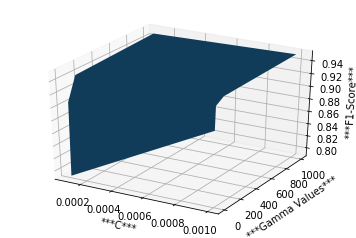

In [19]:
loop =0
a = gamma 
b = C
A, B = np.meshgrid(a, b) 
t = np.zeros([4,2])
for i in range(0,4):
    for j in range(0,2):
        t[i,j]=grid_MSE[loop]
        loop=loop+1
C=t
print(A)
print(B)
print(C)
fig1 = plt.figure()
ax = fig1.gca(projection='3d')

surf = ax.plot_surface(A, B, C, rstride=3, cstride=3, antialiased=True)


ax.set_ylabel('***Gamma Values***')
ax.set_xlabel('***C***')
ax.set_zlabel('***F1-Score***')
plt.show()

Confusion Matrix

In [20]:
SVM_Model=SVC(gamma=0.001,C=1000)

SVM_Model.fit(Xtrain, ytrain)
SVM_Predict = SVM_Model.predict(Xtest)

ConfusionMatrix2= confusion_matrix(ytest,SVM_Predict)

print("CONFUSION MATRIX:\n",ConfusionMatrix2)


CONFUSION MATRIX:
 [[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


In [21]:
SVM_Accuracy = metrics.accuracy_score(ytest,SVM_Predict)
print("SVM Accuracy is: {}".format(SVM_Accuracy))

SVM_Accuracy_Metrics = metrics.f1_score(ytest,SVM_Predict,average='weighted')
print("SVM F1 score is: {}".format(SVM_Accuracy_Metrics))


SVM Accuracy is: 0.9657278588394977
SVM F1 score is: 0.9656245347276229


# Task E

In this depth of range is givenno of trees range is given and after that we will find the best values of tree-depth and number of trees using cross validation =10 based on the model on f1 score,after that we will plot the surface graph for the f2 scores,tree depth and no of trees. Report the confusion matrix.accuracy and the multiclass averaged score.

In [22]:
#Random Forest

depth_range = [300,500,600]
tree_range =  [200, 500,700]

In [23]:
param_grid4 = dict(n_estimators=tree_range,max_depth=depth_range)
print(param_grid4)

{'n_estimators': [200, 500, 700], 'max_depth': [300, 500, 600]}


In [24]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt',oob_score = True)
grid4 = GridSearchCV(rfc,param_grid4, n_jobs=-1,cv=10,scoring='f1_weighted')
grid4.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 500, 700], 'max_depth': [300, 500, 600]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=0)

F1 scores for Random Forest

In [25]:
#F1 Score
print("F1 Scores for random forest are :")
grid4.grid_scores_
grid_mean_scores3 = [result.mean_validation_score for result in grid4.grid_scores_]
print(grid_mean_scores3)
print(grid4.best_score_)

F1 Scores for random forest are :
[0.9307407188660045, 0.9330450444452956, 0.9309220331675957, 0.9295464017539202, 0.9305466846826528, 0.9309102271387747, 0.9296040289361539, 0.931480968767464, 0.9291402631486901]
0.9330450444452956


In [26]:
print("Tree Depth and No of trees based On F1 score is  {}".format(grid4.best_params_))

Tree Depth and No of trees based On F1 score is  {'max_depth': 300, 'n_estimators': 500}


In [27]:
#For finding best estimator
print(grid4.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=300, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


Surface Graph for Depth of trees,f1 scores and Number of trees

[300, 500, 600]
[200, 500, 700]
[[300 500 600]
 [300 500 600]
 [300 500 600]]
[[200 200 200]
 [500 500 500]
 [700 700 700]]
[[0.93074072 0.93304504 0.93092203]
 [0.9295464  0.93054668 0.93091023]
 [0.92960403 0.93148097 0.92914026]]


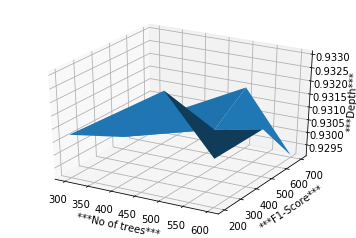

In [28]:
loop=0
a = depth_range 
b = tree_range 
print(a) 
print(b)
A, B = np.meshgrid(a, b) # Create a grid using x and y

o = np.zeros([3,3])
for i in range(0,3):
    for j in range(0,3):
        o[i,j]=grid_mean_scores3[loop]
        loop=loop+1
C=o
print(A)
print(B)
print(C)

fig1 = plt.figure()
ax = fig1.gca(projection='3d') 
surf = ax.plot_surface(A, B, C, rstride=1, cstride=1, antialiased=True)

ax.set_zlabel('***Depth***')
ax.set_xlabel('***No of trees***')
ax.set_ylabel('***F1-Score***') 
plt.show()

After plotting the graph we will get to know the best depth and no of trees.We will find the confusion matrix,accuracy and averaged metrics

In [29]:
rfc_model=RandomForestClassifier(n_estimators=500,max_depth=500)

rfc_model.fit(Xtrain, ytrain)
rfc_predict = rfc_model.predict(Xtest)

#Confusion Matrix
ConfusionMatrix5 = confusion_matrix(ytest,rfc_predict)

print("THE CONFUSION MATRIX IS:\n",ConfusionMatrix5)

rfc_accuracy = metrics.accuracy_score(ytest,rfc_predict)
print("Random Forest Testing Accuracy is: {}".format(rfc_accuracy))

rfc_accuracy_metrics = metrics.f1_score(ytest,rfc_predict,average='weighted')
print("Random Forest F1 score is: {}".format(rfc_accuracy_metrics))




THE CONFUSION MATRIX IS:
 [[482   7   7   0   0   0]
 [ 32 432   7   0   0   0]
 [ 20  43 357   0   0   0]
 [  0   0   0 437  54   0]
 [  0   0   0  40 492   0]
 [  0   0   0   0   0 537]]
Random Forest Testing Accuracy is: 0.9287410926365796
Random Forest F1 score is: 0.9284956900758332


# Task F

We have performed the different types of model like KNN,Elastic Net,Random Forest and Support Vector Machine. We have compared the confusion matrix ,accuracy and F1 score of all the 4 models. After that we come to know that accuracy of the support vector machine is 0.96 and f1 score is also 0.96 and if you observe the confusion matrix diagonal is giving the accurate values in diagonal. If you will compare the results with KNN,elastic net and random tree then you will get to know and make a comparable study among all other models.Random Tree is the best accurate model as its value is 0.96.KNN performed worst as it accuracy is 0.964 whereas for KNN model 0.94 is the accuracy. Yes we can do it better if we will use the J48 model to perform result as it is best classified decision tree and it has the best strategy and conquer method technique and it uses the less memory to run the programs. In this project many models was time consuming.  